In [1]:
import os
import sys
import pandas as pd

notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    

### Load combined dataset (hospital A + B)

In [48]:
from utils import get_data

DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)

### Check dataset structure

In [12]:
combined_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'patient_id', 'dataset'],
      dtype='object')

## Basic exploring


In [ ]:
df_A = combined_df[combined_df['dataset'] == 'A']
df_B = combined_df[combined_df['dataset'] == 'B']

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id,dataset
790215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,73.0,1,1.0,0.0,-214.64,1,0,20337,B


In [10]:
# list column names
df_A.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'patient_id', 'dataset'],
      dtype='object')

In [11]:
# check if both dataset have the same columns
set(df_A.columns) == set(df_B.columns)

True

In [ ]:
numeric_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

other_cols = combined_df.select_dtypes(exclude=['int64', 'float64']).columns
print(other_cols)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'patient_id'],
      dtype='object')
Index(['dataset'], dtype='object')


In [13]:
from utils import analyse_data

analyse_data.summariseSeperateDatasets(df_A, "A")
analyse_data.summariseSeperateDatasets(df_B, "B")

Hospital system: A
  Number of patients: 20336
  Number of septic patients: 1790
  Sepsis prevalence: 8.8%
  Number of rows: 790215
  Number of entries: 11876446
  Density of entries: 35.0%


Hospital system: B
  Number of patients: 20000
  Number of septic patients: 1142
  Sepsis prevalence: 5.7%
  Number of rows: 761995
  Number of entries: 11356429
  Density of entries: 34.7%




### Patient records info

In [14]:
# understanding patient records 
patient_1_records = combined_df[combined_df['patient_id'] == 1]
patient_1_records

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id,dataset
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,1,0,1,A
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,2,0,1,A
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,3,0,1,A
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,4,0,1,A
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,5,0,1,A
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,6,0,1,A
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,7,0,1,A
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,8,0,1,A
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,9,0,1,A
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,10,0,1,A


In [38]:
combined_df["patient_id"].value_counts()

patient_id
16581    336
33526    336
18469    336
36775    336
37742    336
        ... 
17751      8
1118       8
18970      8
211        8
11901      8
Name: count, Length: 40336, dtype: int64

In [51]:
# time between
df = combined_df.copy()

patient_id = df["patient_id"].iloc[3] 
patient_df = df[combined_df["patient_id"] == patient_id].sort_values("ICULOS")

# calculate time differences
patient_df["time_diff"] = patient_df["ICULOS"].diff()

print(patient_df[["ICULOS", "time_diff"]].dropna()) # measurements every hour

    ICULOS  time_diff
1        2        1.0
2        3        1.0
3        4        1.0
4        5        1.0
5        6        1.0
6        7        1.0
7        8        1.0
8        9        1.0
9       10        1.0
10      11        1.0
11      12        1.0
12      13        1.0
13      14        1.0
14      15        1.0
15      16        1.0
16      17        1.0
17      18        1.0
18      19        1.0
19      20        1.0
20      21        1.0
21      22        1.0
22      23        1.0
23      24        1.0
24      25        1.0
25      26        1.0
26      27        1.0
27      28        1.0
28      29        1.0
29      30        1.0
30      31        1.0
31      32        1.0
32      33        1.0
33      34        1.0
34      35        1.0
35      36        1.0
36      37        1.0
37      38        1.0
38      39        1.0
39      40        1.0
40      41        1.0
41      42        1.0
42      43        1.0
43      44        1.0
44      45        1.0
45      46

## JSD metric
- to compare two probability distributions
- ideally as low as possible to avoid overfitting
- useful to check the impact of imputation. bad imputation if there is a large JSD increase

### JSD for all columns

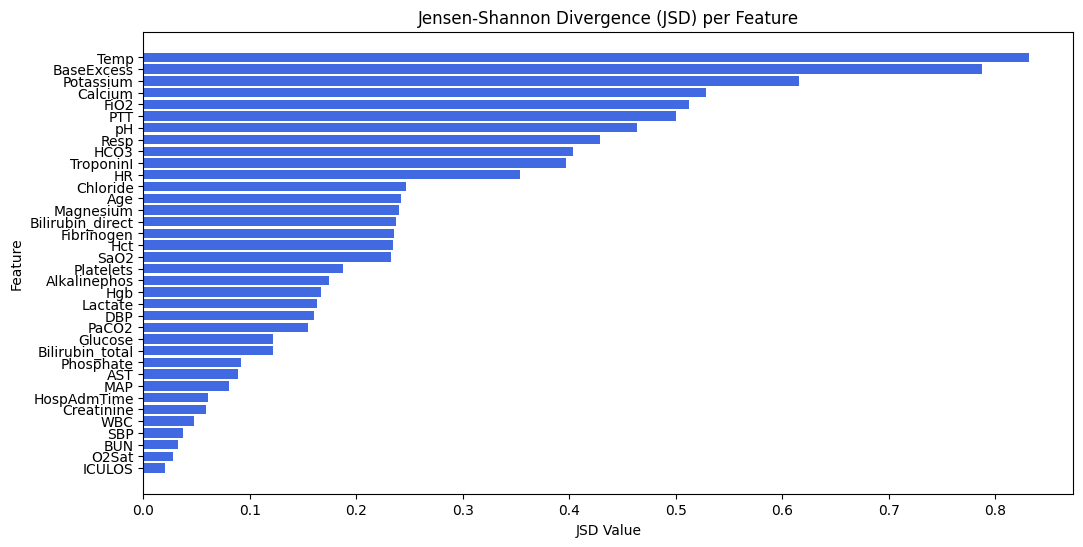

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.spatial.distance import jensenshannon

# exclude continuous columns and id
excluded_cols = ['Gender', 'Unit1', 'Unit2', 'dataset', 'patient_id', 'SepsisLabel'] 
selected_cols = [col for col in combined_df.columns if col not in excluded_cols]

def calculate_jsd_columns(df1, df2, columns):
    jsd_results = {}
    for col in columns:
        p, _ = np.histogram(df1[col].dropna(), bins=20, density=True)
        q, _ = np.histogram(df2[col].dropna(), bins=20, density=True)
        jsd_results[col] = jensenshannon(p, q)
    return jsd_results


jsd_columns = calculate_jsd_columns(df_A, df_B, selected_cols)
jsd_columns = {col: float(round(jsd, 4)) for col, jsd in jsd_columns.items()}


def plot_jsd(jsd_values):
    jsd_values = {k: v for k, v in jsd_values.items() if not np.isnan(v)}

    jsd_values = dict(sorted(jsd_values.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(12, 6))
    plt.barh(list(jsd_values.keys()), list(jsd_values.values()), color='royalblue')
    plt.xlabel("JSD Value")
    plt.ylabel("Feature")
    plt.title("Jensen-Shannon Divergence (JSD) per Feature")
    plt.gca().invert_yaxis()  
    plt.show()

plot_jsd(jsd_columns)

### Indentifying high JSD columns 

In [53]:
jsd_categories = {
    "0.0 - 0.1": [],
    "0.1 - 0.3": [],
    "0.3 - 0.5": [],
    "> 0.5": []
}

for col, jsd in jsd_columns.items():
    if 0.0 <= jsd < 0.1:
        jsd_categories["0.0 - 0.1"].append(col)
    elif 0.1 <= jsd < 0.3:
        jsd_categories["0.1 - 0.3"].append(col)
    elif 0.3 <= jsd < 0.5:
        jsd_categories["0.3 - 0.5"].append(col)
    else:
        jsd_categories["> 0.5"].append(col)

# for category, cols in jsd_categories.items():
#     print(f"{category}: {len(cols)}")
    
total_cols = len(jsd_columns)
for category, cols in jsd_categories.items():
    percentage = (len(cols) / total_cols) * 100
    print(f"{category}: {percentage:.2f}%")

0.0 - 0.1: 27.03%
0.1 - 0.3: 40.54%
0.3 - 0.5: 13.51%
> 0.5: 18.92%


### Overall JSD

In [31]:
valid_jsd_values = [jsd for jsd in jsd_columns.values() if not np.isnan(jsd)]

np.mean(valid_jsd_values) if valid_jsd_values else np.nan

np.float64(0.2580611111111112)

## JSD after imputation

In [64]:
from utils import impute_data

df_imputed = impute_data.impute_df(combined_df)

In [65]:
imputed_A = df_imputed[df_imputed["dataset"] == "A"]
imputed_B = df_imputed[df_imputed["dataset"] == "B"]

jsd_columns = calculate_jsd_columns(imputed_A, imputed_B, selected_cols)

valid_jsd_values = [jsd for jsd in jsd_columns.values() if not np.isnan(jsd)]

np.mean(valid_jsd_values)

np.float64(0.3570081176587891)